In [ ]:
%pip install tqdm

In [1]:
import warnings
import os

from NeuralNetwork.CNN import CNN_MEL, CNN_CHR, CNN_MFCC
from NeuralNetwork.CRNN import CRNN_MEL, CRNN_CHR, CRNN_MFCC

warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # keep this, use the second GPU, i'll use the first one

2024-01-25 23:16:39.396676: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-25 23:16:39.416157: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-25 23:16:39.416179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-25 23:16:39.416714: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-25 23:16:39.420121: I tensorflow/core/platform/cpu_feature_guar

In [2]:
try:
    del model_mel
    del model_chr
    del model_mfcc
    print("clean!")
except:
    pass
model_mel = CRNN_MEL((128, 1293, 1))
model_chr = CNN_CHR((12, 1293, 1))
model_mfcc = CRNN_MFCC((20, 1293, 1))

2024-01-25 23:16:41.198022: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-25 23:16:41.218681: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-25 23:16:41.218783: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 1293, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 646, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 646, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 323, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 323, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 161, 128)      0

In [ ]:
model_mel.train("./dataset/mel2_format", epoch=8)
model_chr.train("./dataset/chr_format", epoch=5)
model_mfcc.train("./dataset/mfcc_format", epoch=35)

In [ ]:
model_mel.save_model("./model/model_mel.h5")
model_chr.save_model("./model/model_chr.h5")
model_mfcc.save_model("./model/model_mfcc.h5")

In [3]:
model_mel.load_model("./model/model_mel.h5")
model_chr.load_model("./model/model_chr.h5")
model_mfcc.load_model("./model/model_mfcc.h5")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 64)            6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 30, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 30, 256)           98560     
                                                                 
 conv1d_4 (Conv1D)           (None, 30, 512)           393728    
                                                                 
 conv1d_5 (Conv1D)           (None, 30, 1024)          1573888   
                                                                 
 conv1d_6 (Conv1D)           (None, 30, 2048)         

2024-01-25 23:16:49.194195: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-01-25 23:16:49.932110: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0b2afc8e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-25 23:16:49.932129: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-01-25 23:16:49.934956: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1706195809.990116  163935 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 [==============================] - 5s 35ms/step - loss: 2.3022 - acc: 0.1060
Epoch 2/400
50/50 [==============================] - 2s 35ms/step - loss: 2.3001 - acc: 0.1050
Epoch 3/400
50/50 [==============================] - 2s 35ms/step - loss: 2.3009 - acc: 0.1040
Epoch 4/400
50/50 [==============================] - 2s 35ms/step - loss: 2.2909 - acc: 0.1590
Epoch 5/400
50/50 [==============================] - 2s 34ms/step - loss: 2.2906 - acc: 0.1460
Epoch 6/400
50/50 [==============================] - 2s 35ms/step - loss: 2.2862 - acc: 0.1370
Epoch 7/400
50/50 [==============================] - 2s 34ms/step - loss: 2.2863 - acc: 0.1410
Epoch 8/400
50/50 [==============================] - 2s 35ms/step - loss: 2.2912 - acc: 0.1190
Epoch 9/400
50/50 [==============================] - 2s 35ms/step - loss: 2.2902 - acc: 0.1330
Epoch 10/400
50/50 [==============================] - 2s 35ms/step - loss: 2.2813 - acc: 0.1350
Epoch 11/400
50/50 [==============================] - 2s 35ms

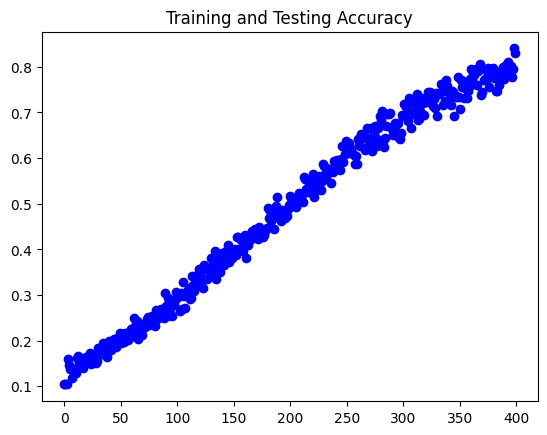

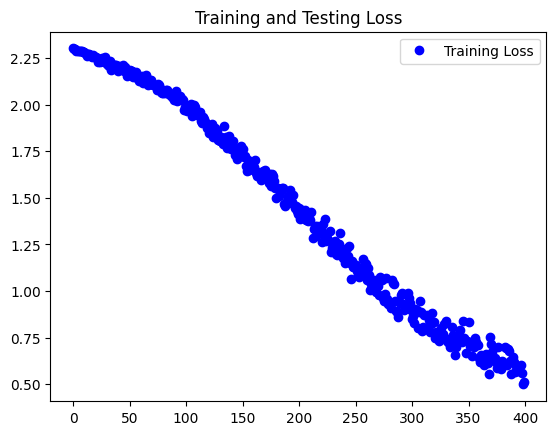

In [4]:
from NeuralNetwork.combine_model import CombineModel
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
combine_model = CombineModel(input_dim=30)
combine_model.train("/home/lumiani/Projects/IML/CS182-FinalProject/dataset/merge_format", epoch=400)

In [29]:
import numpy as np
import librosa

# y, sr = librosa.load("./dataset/test_long/On Va S'aimer Encore.mp3")
# y,  sr = librosa.load("./dataset/test_long/DSM-V.mp3")
# y, sr = librosa.load("./dataset/test_long/许巍 - 蓝莲花.mp3")
# y, sr = librosa.load("./dataset/test_long/Charlie Puth - See You Again.mp3")
# y, sr = librosa.load("./dataset/audio_format/pop/pop.00011.wav")
# y, sr = librosa.load("./dataset/test_long/killing in the name.mp3")
# y, sr = librosa.load("./dataset/test_long/deemo-good-bye.mp3")
# y, sr = librosa.load("dataset/test_long/拉德斯基进..._lan.flac")
# y, sr = librosa.load("dataset/test_long/悲怆 第三章.flac")
# y, sr = librosa.load("dataset/test_long/Bad Apple-のみこ,Masayoshi Minoshima.flac")
# y, sr = librosa.load("dataset/test_long/pf.mp3")
y, sr = librosa.load("dataset/test_long/pfffff.mp3")
# y, sr = librosa.load("")


spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

mel_pic = librosa.power_to_db(spectrogram, ref=np.max)

harmonic = librosa.effects.harmonic(y)  ##
harmonic_features = librosa.feature.chroma_cqt(y=harmonic, sr=sr)  ##

mfccs = librosa.feature.mfcc(y=y, sr=sr)

duration = len(y) / sr



# Assuming model1, model2, model3 are already defined with different input shapes but the same output shape

_, pre_mel = model_mel.predict(mel_pic, duration)
_, pre_chr = model_chr.predict(harmonic_features, duration)
_, pre_mfcc = model_mfcc.predict(mfccs, duration)

pre_mel=pre_mel.flatten()
pre_chr=pre_chr.flatten()
pre_mfcc=pre_mfcc.flatten()

merge_array=[]
for arr in [pre_mel, pre_chr, pre_mfcc]:
    merge_array.extend(arr)
merge_array=np.expand_dims(merge_array, axis=0)
pre = combine_model.model.predict(merge_array)
print(pre)
class_idx = np.argmax(pre, axis=1)[0]
print(["pop", "classical", "pop", "rock", "pop", "jazz", "rock", "pop", "pop", "rock"][class_idx])


1/1 [==============================] - 0s 8ms/step
[[2.5626754e-22 1.1898700e-10 9.9946612e-01 5.6071526e-11 2.0477302e-04
  9.9241264e-09 1.2612492e-07 1.5014808e-12 8.1104381e-21 3.2897139e-04]]
pop


In [ ]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

def read_array_from_txt(input_path):
        try:
            array_data = np.loadtxt(input_path)
            return array_data.reshape(1, -1)  # 将数据 reshape 成 (1, 30)
        except Exception as e:
            print(f"Error reading array from {input_path}: {e}")
            return None

# 定义全连接层模型
def create_fc_model(input_dim=30, output_dim=10):  # 根据你的实际情况设置 output_dim
    model = Sequential()
    model.add(Dense(units=128, input_dim=input_dim, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=output_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

input_data_path = "/home/lumiani/Projects/IML/CS182-FinalProject/dataset/merge_format/blues/blues.00000.txt"
model_output_dim = 10

# 读取数组数据
array_data = read_array_from_txt(input_data_path)
print(array_data)

# 如果成功读取数据，则使用全连接层模型进行训练
if array_data is not None:
    # 创建全连接层模型
    model = create_fc_model(input_dim=array_data.shape[1], output_dim=model_output_dim)

    target_data = np.random.rand(1, model_output_dim)

    # 训练模型
    model.fit(array_data, target_data, epochs=10, batch_size=1)
else:
    print("Error: Unable to proceed with training due to missing array data.")


In [ ]:
import librosa

# 加载音频文件
audio_file = './dataset/audio_format/blues/blues.00000.wav'  # 替换为您的音频文件路径
y, sr = librosa.load(audio_file)

# 1. 音高和旋律特征
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# 2. 节奏和节拍
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 3. 和声和和弦结构
harmonic = librosa.effects.harmonic(y)
harmonic_features = librosa.feature.chroma_cqt(y=harmonic, sr=sr)

# 4. 音色和乐器使用
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# 5. 动态范围和强度
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

# 6. 时间结构和形式
temporal_onset = librosa.onset.onset_strength(y=y, sr=sr)

# 7. 时域特征
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# 输出每个特征的shape
print("Chroma (Pitch):", chroma.shape)
print("Tempo (Rhythm):", beat_times.shape)
print("Harmonic Features (Harmony):", harmonic_features.shape)
print("MFCCs (Timbre):", mfccs.shape)
print("RMS (Dynamics):", rms.shape)
print("Temporal Onset (Form):", temporal_onset.shape)
print("Zero Crossing Rate (Time-domain):", zero_crossing_rate.shape)